Exercise 2

In [13]:
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


Note: The graph below displays recommended plots from Google Colab.


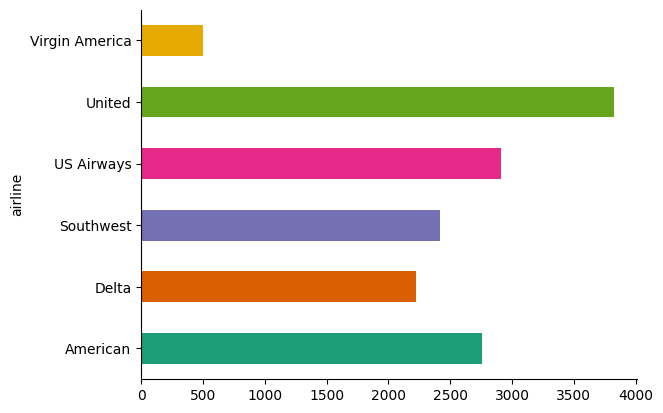

In [4]:
# @title airline

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

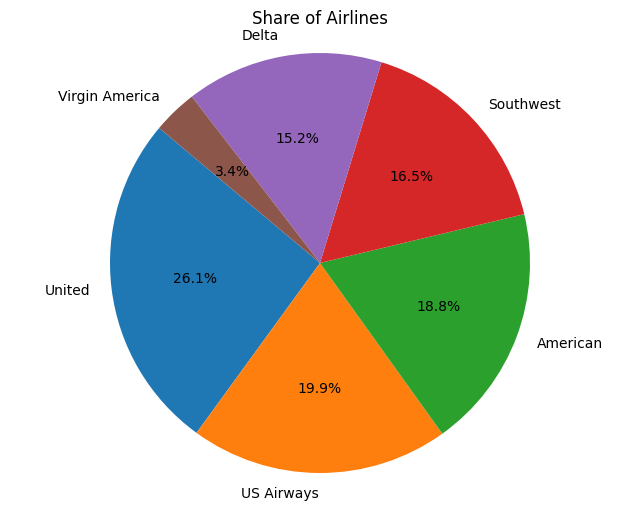

In [6]:
# Count the occurrences of each airline
airline_counts = df['airline'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Airlines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

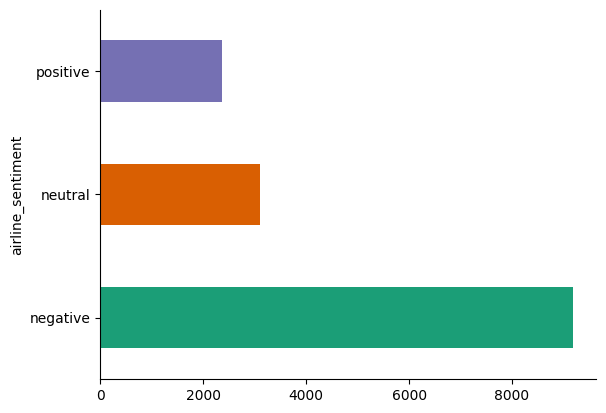

In [7]:
# @title airline_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

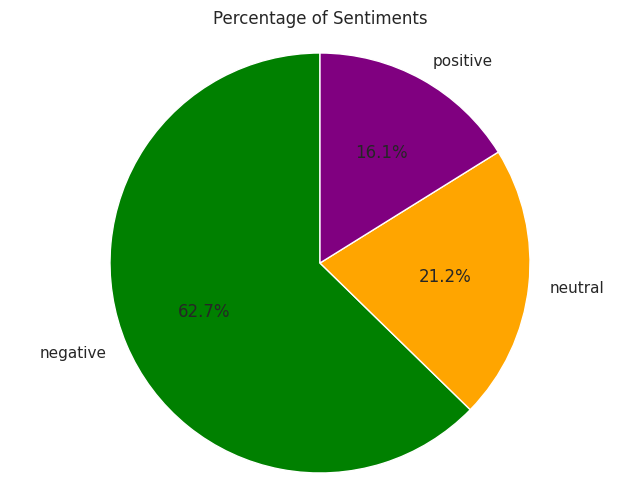

In [15]:
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'orange', 'purple'])
plt.title('Percentage of Sentiments')
plt.axis('equal')  # Ensures that pie is drawn as a circle
plt.show()

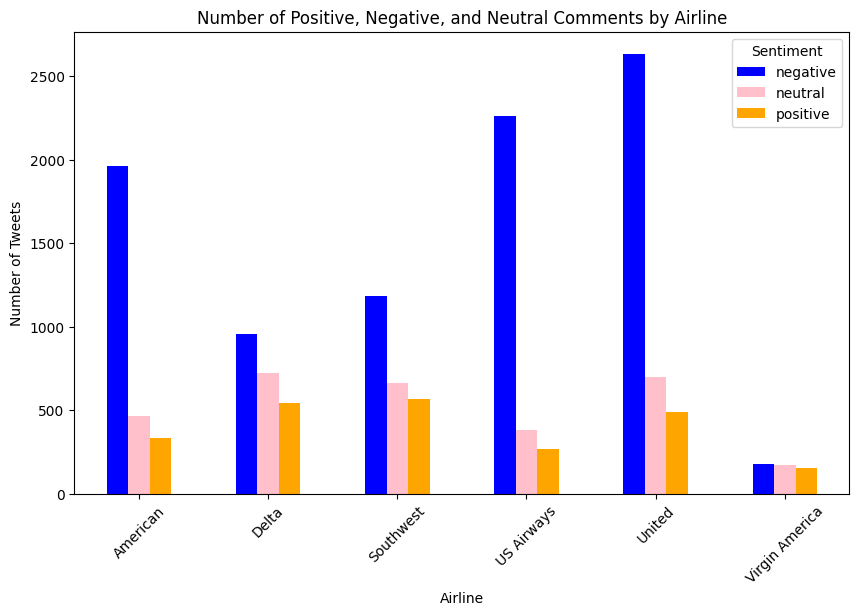

In [11]:
sentiment_by_airline = df.groupby(['airline', 'airline_sentiment']).size().unstack()
sentiment_by_airline.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink', 'orange'])
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.title('Number of Positive, Negative, and Neutral Comments by Airline')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

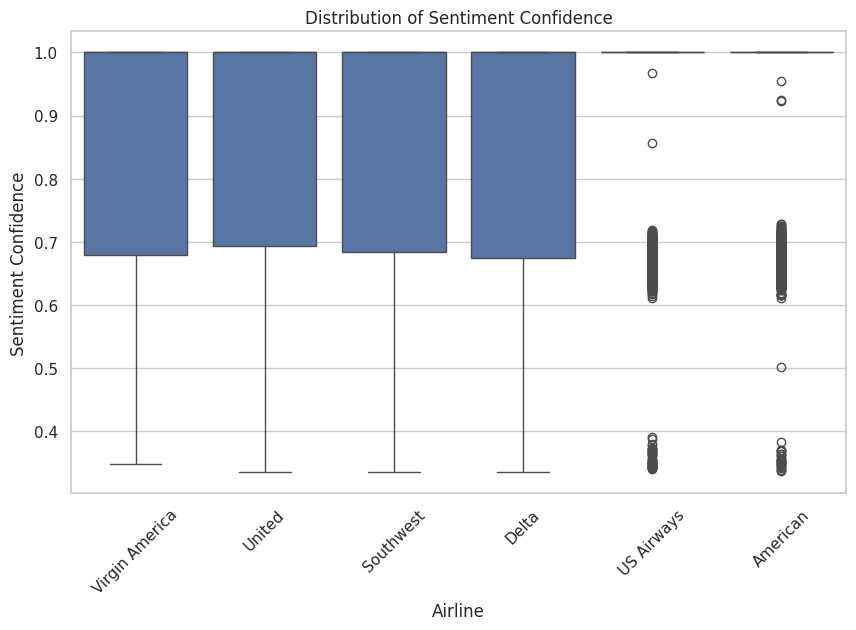

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='airline_sentiment_confidence', data=df)
plt.title('Distribution of Sentiment Confidence')
plt.xlabel('Airline')
plt.ylabel('Sentiment Confidence')
plt.xticks(rotation=45)
plt.show()

In [16]:
X = df['text']
y = df['airline_sentiment']

In [17]:
def clean_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    return text

In [18]:
X_clean = X.apply(clean_text)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_vectorized = vectorizer.fit_transform(X_clean)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.20, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
predictions = rf_classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

In [25]:
accuracy

0.7670765027322405

In [26]:
conf_matrix

array([[1788,   68,   33],
       [ 316,  225,   39],
       [ 182,   44,  233]])

In [30]:
class_report

'              precision    recall  f1-score   support\n\n    negative       0.78      0.95      0.86      1889\n     neutral       0.67      0.39      0.49       580\n    positive       0.76      0.51      0.61       459\n\n    accuracy                           0.77      2928\n   macro avg       0.74      0.61      0.65      2928\nweighted avg       0.76      0.77      0.75      2928\n'

In [31]:
report_dict = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report_dict)
report_df.transpose()

,precision,recall,f1-score,support
negative,0.782152,0.946533,0.856527,1889.000000
neutral,0.667656,0.387931,0.490731,580.000000
positive,0.763934,0.507625,0.609948,459.000000
accuracy,0.767077,0.767077,0.767077,0.767077
macro avg,0.737914,0.614030,0.652402,2928.000000
weighted avg,0.756616,0.767077,0.745413,2928.000000


The model's overall accuracy on the test data is approximately 77%. This means the classifier correctly predicts the sentiment of tweets about 77% of the time.


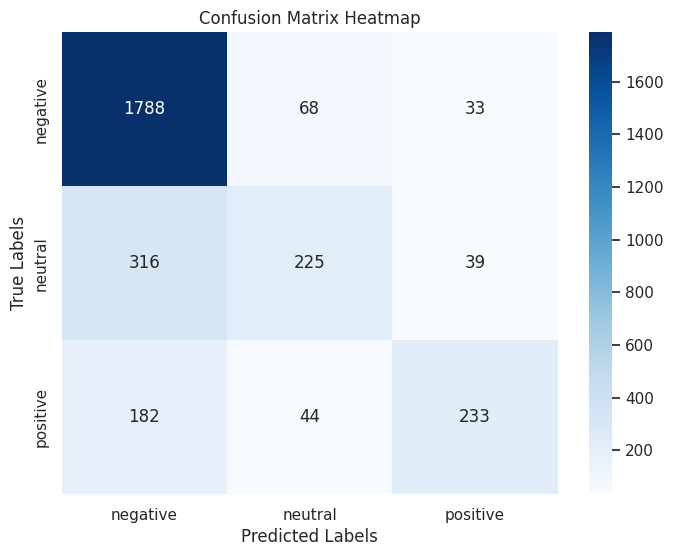

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

This confusion matrix of heatmap clearly illustrates:
- The number of accurate predictions, represented along the diagonal.
- Misclassifications, shown as off-diagonal elements where predicted labels don't align with the true labels.